In [1]:
 
 # abrir a conexao com o banco de dados
import sqlite3
import pandas as pd
import numpy  as np
import gradio as gr
from sklearn import tree     as tr
conn = sqlite3.connect( "database.db" )

In [2]:
# consulta dos dados no banco de dados
consulta_atividade = """
  SELECT
    *
  FROM
    flight_activity fa 
      LEFT JOIN flight_loyalty_history flh 
        ON (fa.loyalty_number=flh.loyalty_number)
 """
df_atividade = pd.read_sql_query(consulta_atividade,conn)

In [3]:
# comando para mostrar a tabela resultante da consulta

df_atividade.head()

,loyalty_number,year,month,flights_booked,flights_with_companions,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed,...,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month
0,100018,2017,1,3,0,3,1521,152.0,0,0,...,Bachelor,92552.0,Married,Aurora,7919.20,Standard,2016,8,NaN,NaN
1,100102,2017,1,10,4,14,2030,203.0,0,0,...,College,NaN,Single,Nova,2887.74,Standard,2013,3,NaN,NaN
2,100140,2017,1,6,0,6,1200,120.0,0,0,...,College,NaN,Divorced,Nova,2838.07,Standard,2016,7,NaN,NaN
3,100214,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,63253.0,Married,Star,4170.57,Standard,2015,8,NaN,NaN
4,100272,2017,1,0,0,0,0,0.0,0,0,...,Bachelor,91163.0,Divorced,Star,6622.05,Standard,2014,1,NaN,NaN


In [4]:
 # fecha a conexao com o banco de dados
conn.close()
df1 = df_atividade.copy()

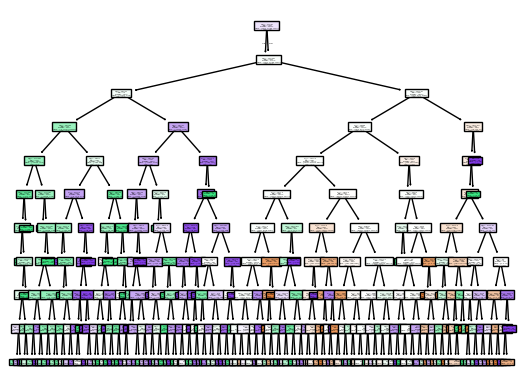

In [5]:
# 4. Como selecionar colunas de uma planilha de dados
 # Exemplo: df2 = df1.loc[linhas, colunas]
colunas = ['year', 'month', 'flights_booked', 'flights_with_companions', 'total_flights', 'distance', 'points_accumulated', 'salary', 'clv', 'loyalty_card']
linhas = ~df1['salary'].isna()
df2 = df1.loc[linhas, colunas]
df3 = df2.copy()

X = df3.drop( columns=['loyalty_card'] )
y = df3.loc[:, 'loyalty_card']

modelo = tr.DecisionTreeClassifier(max_depth=10)
modelo_treinado = modelo.fit(X, y)
tr.plot_tree(modelo_treinado,class_names=['Aurora', 'Nova', 'Star'], filled = True );

In [ ]:

# Função de previsão
def predict(*args):
    X = np.array([args]).reshape(1, -1)
    previsao = modelo_treinado.predict_proba(X)
    return {"Aurora": previsao[0][0], "Nova": previsao[0][1], "Start": previsao[0][2]}

with gr.Blocks() as demo:
    gr.Markdown("# Propensão de Compra")

    with gr.Row():
        with gr.Column():
            gr.Markdown("# Atributos do Cliente")
            year = gr.Slider(label="year", minimum=2017, maximum=2018, step=1, randomize=True)
            month = gr.Slider(label="month", minimum=1, maximum=12, step=1, randomize=True)
            flights_booked = gr.Slider(label="flights_booked", minimum=0, maximum=21, step=1, randomize=True)
            flights_with_companions = gr.Slider(label="flights_with_companions", minimum=0, maximum=11, step=1, randomize=True)
            total_flights = gr.Slider(label="total_flights", minimum=0, maximum=32, step=1, randomize=True)
            distance = gr.Slider(label="distance", minimum=0, maximum=6293, step=1, randomize=True)
            points_accumulated = gr.Slider(label="points_accumulated", minimum=0.00, maximum=676.50, step=0.1, randomize=True)
            salary = gr.Slider(label="salary", minimum=-58486.00, maximum=407228.00, step=0.1, randomize=True)
            clv = gr.Slider(label="clv", minimum=2119.89, maximum=83325.38, step=0.1, randomize=True)

    with gr.Row():
        predict_btn = gr.Button(value="Previsão")
        with gr.Column():
          label = gr.Label()

    # Botão de previsão
    predict_btn.click(
        fn=predict,
        inputs=[year, month, flights_booked, flights_with_companions, total_flights, distance, points_accumulated, salary, clv],
        outputs=[label],
    )

demo.launch(debug=True, share=False)


* Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


c:\Users\FUJITSU\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
